# Quantum harmonic oscillator

:::{admonition} *What you need to know**

- **Quantization of Vibrations in Molecules:** Vibrational degrees of freedom are quantized, with important implications for infrared and Raman spectroscopies, as well as molecular bonding.
- **Existence of Zero-Point Energy and Tunneling:** Energy is non-zero even at absolute zero temperature, which we will understand as a consequence of the uncertainty principle.
- **Hermite Polynomials as Eigenfunctions:** We will explore how Hermite polynomials serve as the eigenfunctions of the quantum harmonic oscillator.
- **Effects of Anharmonicity:** Moving beyond the harmonic approximation, we will examine how anharmonicity impacts energy levels in oscillators.
- **Raising and Lowering Operators:** These operators offer an elegant method for solving the harmonic oscillator problem, marking our first introduction to a powerful tool used throughout quantum mechanics.
:::

### Hamitlonian of Harmonic Oscillator

- Taking the classical Hamiltonian for a harmonic oscillator is given by:

$${H =  \frac{1}{2\mu}p_x^2 + \frac{1}{2}kx^2}$$

- The [quantum mechanicalm harmonic oscillator](http://en.wikipedia.org/wiki/Quantum_harmonic_oscillator) is obtained by replacing the classical position and momentum by the corresponding quantum mechanical operators

$${\hat{H} = -\frac{\hbar^2}{2\mu}\frac{d^2}{dx^2} + \frac{1}{2}kx^2 }$$

- Now the probelm is to solve for eignefunctions and eigenvalues. 

$$\hat{H}\psi_v(x) = E_v \psi_v(x) $$

**Parameters of the Hamiltonian**
- $k=\frac{\mu}{\omega}$ Spring constant 
- Angular frequency of vibrations $\omega=2\pi \nu$ 
- $\nu$,  Frequency (Hz; do not confuse this with quantum number $v$) 

### Eigenfunctions and Eiganvalues 

:::{admonition} **Eigenfunctions/Eiganvalues of HO**
:class: important 


$${E_v = \left(v + \frac{1}{2}\right)\hbar\omega}$$

$${\psi_v = N_v\cdot{H_v\left(\sqrt{\alpha}x\right)}\cdot e^{-\alpha x^2/2}}$$

$$v=0,1,2,3...$$

- **Scaling factor**, $\alpha = \sqrt{\frac{k\mu}{\hbar^2}}$
- **Normalization factor**,  ${N_v = \frac{1}{\sqrt{2^vv!}}\left(\frac{\alpha}{\pi}\right)^{1/4}}$
- **[Hermite polynomials](http://en.wikipedia.org/wiki/Hermite_polynomials)**, $H_v$ 
:::

- For example, the wavefunctions for the two lowest states are:

$${\psi_0(x) = \left(\frac{\alpha}{\pi}\right)^{1/4}e^{-\alpha x^2/2}}$$

$${\psi_1(x) = \left(\frac{4\alpha^3}{\pi}\right)^{1/4} x e^{-\alpha x^2/2}}$$


### Hermite polynomials show nodal and symmetry features of wavefunctions

| n  | Hermite Polynomial $( H_n(x))$ |
|----|---------------------------------|
| 0  | $1$                               |
| 1  | $2x$                              |
| 2  | $4x^2 - 2$                        |
| 3  | $8x^3 - 12x$                      |
| 4  | $16x^4 - 48x^2 + 12$              |


Hermite polynomials obey the following relations which are useful when evaluating integrals. 

**Characteristic Equation**

$${H_v''(y) - 2yH_v'(y) + 2vH_v(y) = 0}$$

**Recursion Relation**

$${H_{v+1}(y) = 2yH_v(y) - 2vH_{v-1}(y)}$$

**Orthogonality and Normalization**

$${\int\limits_{-\infty}^{\infty}H_{v'}(y)H_v(y)e^{-y^2}dy = \left\lbrace\begin{matrix}
0, & \textnormal{ if }v' \ne v\\
\sqrt{\pi}2^vv!, & \textnormal{ if }v' = v\\
\end{matrix}\right.
}$$

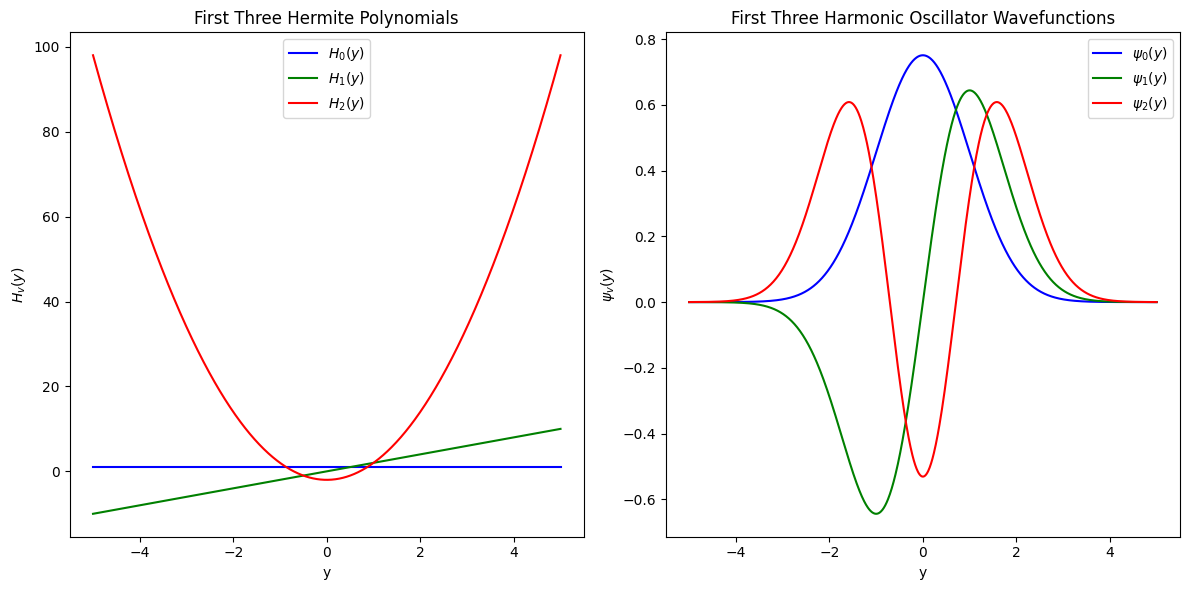

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite, factorial

# Hermite polynomial H_v(y)
def H_v(v, y):
    return hermite(v)(y)

# Harmonic oscillator wavefunction ψ_v(y)
def psi_v(v, y):
    norm_factor = 1 / np.sqrt(2**v * factorial(v) * np.sqrt(np.pi))
    return norm_factor * H_v(v, y) * np.exp(-y**2 / 2)

# Define the y values
y_values = np.linspace(-5, 5, 1000)

# Plot the first three Hermite polynomials
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Hermite polynomials H_0, H_1, H_2
axs[0].plot(y_values, H_v(0, y_values), label=r'$H_0(y)$', color='blue')
axs[0].plot(y_values, H_v(1, y_values), label=r'$H_1(y)$', color='green')
axs[0].plot(y_values, H_v(2, y_values), label=r'$H_2(y)$', color='red')
axs[0].set_title('First Three Hermite Polynomials')
axs[0].set_xlabel('y')
axs[0].set_ylabel(r'$H_v(y)$')
axs[0].legend()

# Harmonic oscillator wavefunctions ψ_0, ψ_1, ψ_2
axs[1].plot(y_values, psi_v(0, y_values), label=r'$\psi_0(y)$', color='blue')
axs[1].plot(y_values, psi_v(1, y_values), label=r'$\psi_1(y)$', color='green')
axs[1].plot(y_values, psi_v(2, y_values), label=r'$\psi_2(y)$', color='red')
axs[1].set_title('First Three Harmonic Oscillator Wavefunctions')
axs[1].set_xlabel('y')
axs[1].set_ylabel(r'$\psi_v(y)$')
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Set constants
VMAX = 6
QPAD_FRAC = 1.3
SCALING = 0.7
COLOUR1 = 'blue'
COLOUR2 = 'red'

# Normalization constant and energy for vibrational state v
def N(v):
    return 1. / np.sqrt(np.sqrt(np.pi) * 2**v * factorial(v))

def get_E(v):
    return v + 0.5

# Generate Hermite polynomials
def make_Hr():
    Hr = [np.poly1d([1.]), np.poly1d([2., 0.])]
    for v in range(2, VMAX + 1):
        Hr.append(2 * np.poly1d([1., 0.]) * Hr[v-1] - 2 * (v-1) * Hr[v-2])
    return Hr

Hr = make_Hr()

# Get wavefunction and turning points
def get_psi(v, q):
    return N(v) * Hr[v](q) * np.exp(-q**2 / 2)

def get_turning_points(v):
    qmax = np.sqrt(2 * get_E(v))
    return -qmax, qmax

# Get potential energy
def get_potential(q):
    return q**2 / 2

# Plot function
def plot_func(ax, f, q, scaling=1, yoffset=0):
    ax.plot(q, f * scaling + yoffset, color=COLOUR1)
    ax.fill_between(q, f * scaling + yoffset, yoffset, f > 0, color=COLOUR1, alpha=0.5)
    ax.fill_between(q, f * scaling + yoffset, yoffset, f < 0, color=COLOUR2, alpha=0.5)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Generate q range and potential
qmin, qmax = get_turning_points(VMAX)
xmin, xmax = QPAD_FRAC * qmin, QPAD_FRAC * qmax
q = np.linspace(qmin, qmax, 500)
V = get_potential(q)

# Plot potential and wavefunctions for both psi and |psi|^2
for ax, prob_plot in zip(axs, [False, True]):
    ax.plot(q, V, color='k', linewidth=1.5, label='Potential $V(q)$')
    for v in range(VMAX + 1):
        psi_v = get_psi(v, q)
        E_v = get_E(v)
        plot_func(ax, psi_v**2 if prob_plot else psi_v, q, scaling=SCALING * (1.5 if prob_plot else 1), yoffset=E_v)
        ax.text(s=f'$E_{v} = {E_v:.1f}$', x=qmax + 0.2, y=E_v + 0.1, va='center', ha='left')
        ax.axhline(y=E_v, color='gray', linestyle='--', alpha=0.7)  # Draw energy levels as dashed lines
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, E_v + 0.5)
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('center')
    ax.set_xlabel('$q$', fontsize=12)
    ylabel = r'$|\psi(q)|^2$' if prob_plot else r'$\psi(q)$'
    ax.set_title(ylabel, fontsize=14)
    ax.legend()

plt.tight_layout()
plt.show()


### Odd/even symmetry of wavefunctions

- Solutions $\psi_v$ with $v = 0, 2, 4, ...$ are even: $\psi_v(x) = \psi_v(-x)$.

- Solutions $\psi_v$ with $v = 1, 3, 5, ...$ are odd: $\psi_v(x) = -\psi_v(-x)$.

**Conseqeuences for evaluating integrals**

- Integral of an odd function from $-a$ to $a$ ($a$ may be $\infty$) is zero.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.integrate import quad

# Hermite polynomial H_v(y) function
def H_v(v, y):
    return hermite(v)(y)

# Function to compute the product of H_v and H_v' for orthogonality check
def integrand(y, v1, v2):
    return H_v(v1, y) * H_v(v2, y) * np.exp(-y**2)

# Compute orthogonality integral
def check_orthogonality(v1, v2):
    # Integral of the product of two Hermite polynomials with exp(-y^2)
    integral, _ = quad(lambda y: integrand(y, v1, v2), -10, 10)  # Using finite limits for stability
    return integral

# Define the y range for plotting
y_values = np.linspace(-5, 5, 1000)

# Plot and check orthogonality for different pairs
def plot_orthogonality(v1, v2):
    H1 = H_v(v1, y_values)
    H2 = H_v(v2, y_values)
    product = H1 * H2 * np.exp(-y_values**2)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(y_values, product, label=f'Product $H_{{{v1}}}(y) H_{{{v2}}}(y) e^{{-y^2}}$', color='purple')
    ax.fill_between(y_values, 0, product, where=(product > 0), color='blue', alpha=0.5, label='Positive area')
    ax.fill_between(y_values, 0, product, where=(product < 0), color='red', alpha=0.5, label='Negative area')
    
    # Orthogonality integral
    integral_value = check_orthogonality(v1, v2)
    ax.set_title(f'Orthogonality Check: $H_{{{v1}}}(y)$ and $H_{{{v2}}}(y)$ \n Integral Value = {integral_value:.2e}')
    ax.set_xlabel('y')
    ax.set_ylabel(f'$H_{{{v1}}}(y) H_{{{v2}}}(y) e^{{-y^2}}$')
    ax.axhline(0, color='black', linestyle='--')
    ax.legend()
    plt.show()

# Plot orthogonality for different cases
plot_orthogonality(1, 2)  # Odd vs Even: H_1(y) and H_2(y)
plot_orthogonality(0, 2)  # Even vs Even: H_0(y) and H_2(y)
plot_orthogonality(1, 3)  # Odd vs Odd: H_1(y) and H_3(y)


### Interpreting solutions

- The tails of the wavefunctions penetrate into the potential barrier deeper than the classical physics would allow. This phenomenon is called **tunneling.**
- As we excite the system to higher levels probability distribution accumulates near edges thereby approaching classical prediction. 

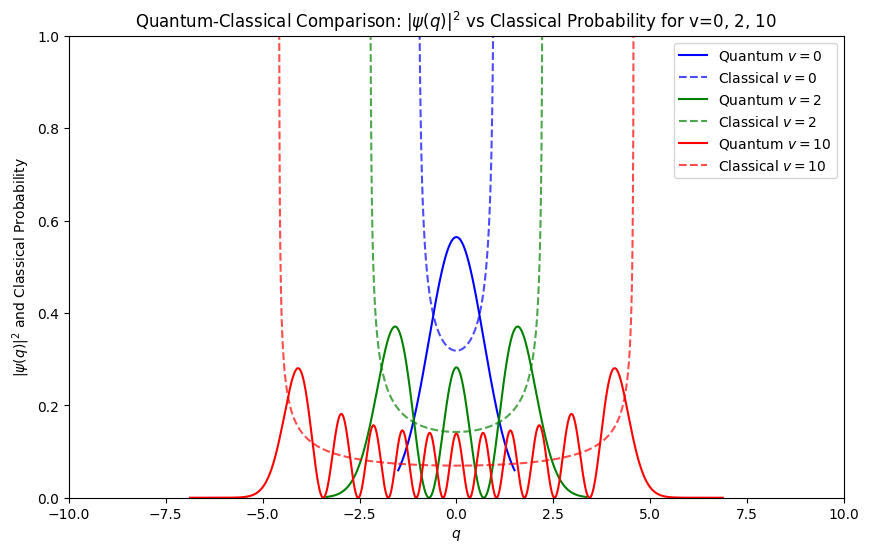

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Set constants
QPAD_FRAC = 1.3
SCALING = 1.0
COLORS = ['blue', 'green', 'red']  # Different colors for each wavefunction
V_VALUES = [0, 2, 10]  # Vibrational quantum numbers to plot

# Normalization constant for vibrational state v
def normalization_constant(v):
    return 1. / np.sqrt(np.sqrt(np.pi) * 2**v * factorial(v))

# Energy for vibrational state v
def energy_level(v):
    return v + 0.5

# Generate Hermite polynomials
def make_Hermite_polynomials(v_max):
    Hr = [np.poly1d([1.]), np.poly1d([2., 0.])]
    for v in range(2, v_max + 1):
        Hr.append(2 * np.poly1d([1., 0.]) * Hr[v-1] - 2 * (v-1) * Hr[v-2])
    return Hr

# Get wavefunction for level v on grid q
def get_wavefunction(v, q, Hr):
    return normalization_constant(v) * Hr[v](q) * np.exp(-q**2 / 2)

# Get classical turning points for state v
def get_turning_points(v):
    qmax = np.sqrt(2 * energy_level(v))
    return -qmax, qmax

# Classical probability distribution for a harmonic oscillator
def classical_probability(v, q):
    qmax = np.sqrt(2 * energy_level(v))
    return 1 / (np.pi * np.sqrt(qmax**2 - q**2))

# Create plot
def plot_wavefunctions_square(v_values, colors):
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Generate Hermite polynomials up to the maximum v in v_values
    v_max = max(v_values)
    Hr = make_Hermite_polynomials(v_max)
    
    # Plot quantum probability distributions for each v
    for v, color in zip(v_values, colors):
        qmin, qmax = get_turning_points(v)
        q = np.linspace(qmin * 1.5, qmax * 1.5, 5000)  # Increased resolution
        psi_v_square = get_wavefunction(v, q, Hr)**2
        
        # Plot |psi|^2 for quantum mechanical probability
        ax.plot(q, psi_v_square, label=f'Quantum $v={v}$', color=color)
        
        # Plot classical probability for the same v
        q_classical = np.linspace(-qmax, qmax, 1000)
        classical_prob = classical_probability(v, q_classical)
        ax.plot(q_classical, classical_prob, '--', label=f'Classical $v={v}$', color=color, alpha=0.7)

    ax.set_xlim(-10, 10)
    ax.set_ylim([0, 1])
    ax.set_xlabel('$q$')
    ax.set_ylabel(r'$|\psi(q)|^2$ and Classical Probability')
    ax.set_title('Quantum-Classical Comparison: $|\psi(q)|^2$ vs Classical Probability for v=0, 2, 10')
    ax.legend()
    
    plt.show()
    
# Plot wavefunction squares for v=0, 10, 100, and classical probability
plot_wavefunctions_square(V_VALUES, COLORS)


### Problems

:::{admonition} **Problem 1**  
:class: note

Show that the lowest level of Harmonic oscillator obeys the uncertainty principle.
:::

:::{admonition} **Solution**
:class: dropdown

$$\Delta x = \sigma_x = \sqrt{\left<\hat{x}^2\right> - \left<\hat{x}\right>^2}\textnormal{ and }\Delta p_x = \sigma_{p_x} = \sqrt{\left<\hat{p}_x^2\right> - \left<\hat{p}_x\right>^2}$$

First we calculate $\left<\hat{x}\right>$ ($\psi_0$ is an even function, $x$ is odd, the integrand is odd overall):

$$\left<\hat{x}\right> = \int\limits_{-\infty}^{\infty} \psi_0(x)x\psi_0(x)dx = 0$$


For $\left<\hat{x}^2\right>$ we have (integration by parts or tablebook):

$$\left<\hat{x}^2\right> = \int\limits_{-\infty}^{\infty} \psi_0(x)x^2\psi_0(x)dx = \left(\frac{\alpha}{\pi}\right)^{1/2}\int\limits_{-\infty}^{\infty}x^2e^{-\alpha x^2}dx = \left(\frac{\alpha}{\pi}\right)^{1/2} \left[\frac{1}{2\alpha}\left(\frac{\pi}{\alpha}\right)^{1/2}\right]$$


$$= \frac{1}{2\alpha} = \frac{1}{2}\frac{\hbar}{\sqrt{\mu k}} \Rightarrow \Delta x = \sqrt{\frac{1}{2}\frac{\hbar}{\sqrt{\mu k}}}$$

For $\left<\hat{p}_x\right>$ we have again by symmetry:

$$\left<\hat{p}_x\right> = \int\limits_{-\infty}^{\infty} \underbrace{\psi_0(x)}_{\textnormal{even}} \underbrace{\left(-i\hbar\frac{d}{d x}\right) \underbrace{\psi_0(x)}_{\textnormal{even}}}_{\textnormal{odd}} dx = 0$$

Note that derivative of an even function is an odd function. For $\left<\hat{p}_x^2\right>$ we have:

$$\left<\hat{p}_x^2\right> = \int\limits_{-\infty}^{\infty} \psi_0(x)p_x^2\psi_0(x)dx = -\hbar^2\left(\frac{\alpha}{\pi}\right)^{1/2}\int\limits_{-\infty}^{\infty} e^{-\alpha x^2/2} \frac{d^2}{dx^2} e^{-\alpha x^2/2} dx$$
$$= \hbar^2\left(\frac{\alpha}{\pi}\right)^{1/2} \int\limits_{-\infty}^{\infty} (\alpha - \alpha^2 x^2)e^{-\alpha x^2}dx = \left[\hbar^2\left(\frac{\alpha}{\pi}\right)^{1/2}\right]$$
$$\times\left(\alpha\int\limits_{-\infty}^{\infty} e^{-\alpha x^2}dx - \alpha^2\int\limits_{-\infty}^{\infty}x^2e^{-\alpha x^2}dx\right)$$



$$ = \underbrace{\left[\hbar^2\left(\frac{\alpha}{\pi}\right)^{1/2}\right]\times \left(\alpha\sqrt{\frac{\pi}{\alpha}} - \alpha^2 \frac{\sqrt{\pi}}{2\alpha^{3/2}}\right)}_{\textnormal{\href{http://en.wikipedia.org/wiki/Gaussian_integral}{\underline{tablebook}}}}$$
$$ = \left[\hbar^2\sqrt{\frac{\alpha}{\pi}}\right]\times\left(\sqrt{\pi\alpha} - \frac{\sqrt{\pi\alpha}}{2}\right) = \frac{\hbar^2\alpha}{2} = \frac{\hbar\sqrt{\mu k}}{2} \Rightarrow \Delta p_x = \sqrt{\frac{\hbar\sqrt{\mu k}}{2}}$$

Finally, we can calculate $\Delta x\Delta p_x$:

$$\Delta x\Delta p_x = \sqrt{\frac{1}{2}\frac{\hbar}{\sqrt{\mu k}}}\times \sqrt{\frac{\hbar\sqrt{\mu k}}{2}} = \sqrt{\frac{\hbar^2}{4}} = \frac{\hbar}{2}$$

Recall that the uncertainty principle stated that: $\Delta x\Delta p_x \ge \frac{\hbar}{2}$


Thus we can conclude that $\psi_0$ fulfills the Heisenberg uncertainty principle.
:::




:::{admonition} **Problem 2**  
:class: note

Quantization of nuclear motion. [Molecular vibration](http://en.wikipedia.org/wiki/Molecular_vibration) in a diatomic molecule can be approximated by the quantum mechanical harmonic oscillator model. There $\mu$ is the reduced mass as given previously and the variable $x$ is the distance between the atoms in the molecule (or more exactly, the deviation from the equilibrium bond length $R_e$).

- a. Derive the expression for the standard deviation of the bond length in a diatomic molecule when it is in its ground vibrational state.
- b. What percentage of the equilibrium bond length is this standard deviation for carbon monoxide in its ground vibrational state? For $^{12}C^{16}O$, we have:
$\tilde{v}$ = 2170 cm$^{-1}$ (vibrational frequency) and $R_e$ = 113 pm (equilibrium bond length)
:::


:::{admonition} **Solution**
:class: dropdown

The harmonic vibration frequency is given in wavenumber units ($cm^{-1}$). This must be converted according to: $\nu = c\tilde{v}$. The previous example gives expression for $\sigma_x$:

$$\sigma_x = \Delta x = \sqrt{\frac{1}{2}\frac{\hbar}{\sqrt{\mu k}}}$$

In considering spectroscopic data, it is convenient to express this in terms of $\tilde{v}$:

$$k = \left(2\pi c\tilde{v}\right)^2\mu\textnormal{ and }\Delta x = \sigma_x = \sqrt{\frac{\hbar}{4\pi c\tilde{v}\mu}}$$


In part (b) we have to apply the above expression to find out the standard deviation for carbon monoxide bond length in its ground vibrational state. First we need the reduced mass:

$$\mu = \frac{m_1m_2}{m_1 + m_2} = \frac{(12\times 10^{-3}\textnormal{ kg mol}^{-1})(15.995\times 10^{-3}\textnormal{ kg mol}^{-1})}
{((12 + 15.995)\times 10^{-3}\textnormal{ kg mol}^{-1})\underbrace{(6.022\times 10^{23}\textnormal{ mol}^{-1})}_{\textnormal{Avogadro's constant}}}$$
$$ = 1.139\times 10^{-26}\textnormal{ kg}$$

The standard deviation is now:

$$\Delta x = \sigma_x = \left[\frac{1.055\times 10^{-34}\textnormal{ Js}}{4\pi\underbrace{\left(2.998\times 10^{10}\textnormal{ cm s}^{-1}\right)}_{\textnormal{speed of light}}\left(2170\textnormal{ cm}^{-1}\right)\left(1.139\times 10^{-26}\textnormal{ kg}\right)}\right]^{1/2}$$
$$ = 3.37\textnormal{ pm} \Rightarrow \textnormal{\% of deviation} = 100\%\times\frac{3.37\textnormal{ pm}}{113\textnormal{ pm}} = 2.98\%$$
:::